### Start with networkx

In [1]:
!conda install networkx -q -y

Fetching package metadata: ....
Solving package specifications: .............
Package plan for installation in environment /Users/your/anaconda/envs/101:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    xz-5.0.5                   |                1         173 KB
    setuptools-19.6.2          |           py35_0         368 KB
    wheel-0.29.0               |           py35_0          82 KB
    networkx-1.11              |           py35_0         1.1 MB
    pip-8.0.2                  |           py35_0         1.5 MB
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

    networkx:   1.11-py35_0  

The following packages will be UPDATED:

    pip:        8.0.1-py35_0  --> 8.0.2-py35_0 
    setuptools: 19.4-py35_0   --> 19.6.2-py35_0
    wheel:      0.26.0-py35_1 

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/your/anaconda/envs/101/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
n = 10

In [4]:
adj = [(i, (i + 1) % n) for i in range(n)]
adj

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 0)]

In [5]:
adj += [(i, (i + 2) % n) for i in range(n)]
adj

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 0),
 (0, 2),
 (1, 3),
 (2, 4),
 (3, 5),
 (4, 6),
 (5, 7),
 (6, 8),
 (7, 9),
 (8, 0),
 (9, 1)]

In [6]:
# Graph as a list of edges
g = nx.Graph(adj)

In [8]:
print(g.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [10]:
print(g.edges())

[(0, 8), (0, 1), (0, 2), (0, 9), (1, 9), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 8), (6, 7), (7, 8), (7, 9), (8, 9)]


In [11]:
print(nx.adjacency_matrix(g))

  (0, 1)	1
  (0, 2)	1
  (0, 8)	1
  (0, 9)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (1, 9)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (3, 1)	1
  (3, 2)	1
  (3, 4)	1
  (3, 5)	1
  (4, 2)	1
  (4, 3)	1
  (4, 5)	1
  (4, 6)	1
  (5, 3)	1
  (5, 4)	1
  (5, 6)	1
  (5, 7)	1
  (6, 4)	1
  (6, 5)	1
  (6, 7)	1
  (6, 8)	1
  (7, 5)	1
  (7, 6)	1
  (7, 8)	1
  (7, 9)	1
  (8, 0)	1
  (8, 6)	1
  (8, 7)	1
  (8, 9)	1
  (9, 0)	1
  (9, 1)	1
  (9, 7)	1
  (9, 8)	1


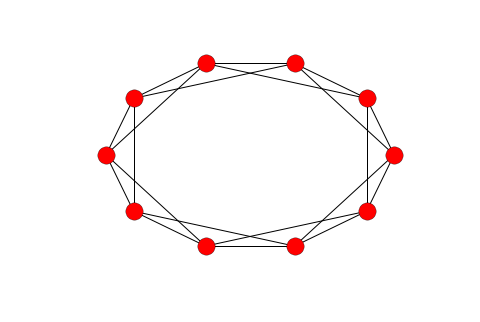

In [12]:
nx.draw_circular(g)

In [13]:
# every node and edge comes with a convenient python dictionary containing arbitrary attributes
# Add new node
g.add_node(n, color='#fcff00')
# Add edges for the node
for i in range(n):
    g.add_edge(i, n)

In [17]:
# define custom node positions on a circle
# except the last node which is at the center
t = np.linspace(0.0, 2 * np.pi, n)

In [20]:
pos = np.zeros((n + 1, 2))
pos[:n, 0] = np.cos(t)  # assign coordinate x, except the last row
pos[:n, 1] = np.sin(t)  # assign coordinate y, except the last row
pos

array([[  1.00000000e+00,   0.00000000e+00],
       [  7.66044443e-01,   6.42787610e-01],
       [  1.73648178e-01,   9.84807753e-01],
       [ -5.00000000e-01,   8.66025404e-01],
       [ -9.39692621e-01,   3.42020143e-01],
       [ -9.39692621e-01,  -3.42020143e-01],
       [ -5.00000000e-01,  -8.66025404e-01],
       [  1.73648178e-01,  -9.84807753e-01],
       [  7.66044443e-01,  -6.42787610e-01],
       [  1.00000000e+00,  -2.44929360e-16],
       [  0.00000000e+00,   0.00000000e+00]])

In [21]:
# node's color is specified by its color attribute
color = [g.node[i].get('color', '#88b0f3') for i in range(n + 1)]
color

['#88b0f3',
 '#88b0f3',
 '#88b0f3',
 '#88b0f3',
 '#88b0f3',
 '#88b0f3',
 '#88b0f3',
 '#88b0f3',
 '#88b0f3',
 '#88b0f3',
 '#fcff00']

(-1.5, 1.5, -1.5, 1.5)

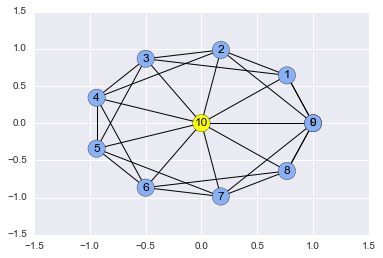

In [24]:
# draw the graph with matplotlib
nx.draw_networkx(g, pos=pos, node_color=color)
plt.axis('on')

(-0.20000000000000001,
 1.2000000000000002,
 -0.20000000000000001,
 1.2000000000000002)

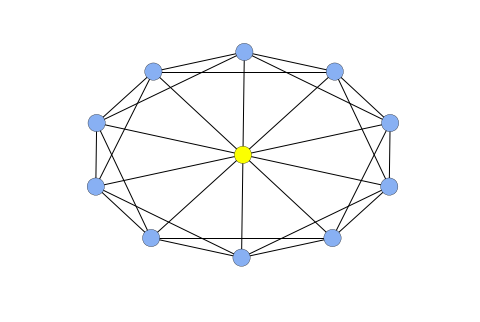

In [23]:
nx.draw_spectral(g, node_color=color)
plt.axis('off')

### Analyzing a social network with networkx

In [25]:
!pip install twitter

    100% |████████████████████████████████| 57kB 487kB/s 


In [26]:
%%writefile twitter.txt
6e3sLmORP4Hqos8DHwSa1cDEn
xXRdAyV8SF4vz6ibk0J1e6YVPCNvrZuYeKjybmhgfZsIDab2Qj
732718446-jmB292b44uboX3IyZwqGXBHHyIMuct15SdCDU194
DYunG0GAnL1RVQw8FTUNVzN9avrajj4Xg745ZH9U4qEmx

Writing twitter.txt


In [27]:
import math
import json
import twitter
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Image

In [28]:
(
    CONSUMER_KEY,
    CONSUMER_SECRET,
    OATH_TOKEN,
    OATH_TOKEN_SECRET
) = open('twitter.txt', 'r').read().splitlines()

In [29]:
CONSUMER_KEY

'6e3sLmORP4Hqos8DHwSa1cDEn'

In [30]:
# create twitter class for api
auth = twitter.oauth.OAuth(OATH_TOKEN, OATH_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)
tw = twitter.Twitter(auth=auth)

In [31]:
# obtain personal info from twitter rest api
me = tw.account.verify_credentials()
me

{'contributors_enabled': False,
 'created_at': 'Thu Aug 02 12:07:38 +0000 2012',
 'default_profile': False,
 'default_profile_image': False,
 'description': '',
 'entities': {'description': {'urls': []}},
 'favourites_count': 69,
 'follow_request_sent': False,
 'followers_count': 61,
 'following': False,
 'friends_count': 285,
 'geo_enabled': True,
 'has_extended_profile': False,
 'id': 732718446,
 'id_str': '732718446',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': 'zh-tw',
 'listed_count': 1,
 'location': '',
 'name': 'Yu-Ting Hung',
 'notifications': False,
 'profile_background_color': '0F0F0F',
 'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/697542642/a128d01a89937ab6acaf03ec4fceb44b.jpeg',
 'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/697542642/a128d01a89937ab6acaf03ec4fceb44b.jpeg',
 'profile_background_tile': False,
 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/732718

In [33]:
myid = me['id']
myid

732718446

In [34]:
def get_follower_ids(uid=None):
    return tw.followers.ids(user_id=uid)['ids']

In [35]:
my_follower_ids = get_follower_ids(myid)
my_follower_ids

[11961362,
 825043074,
 546660695,
 3907179810,
 2725456940,
 3256477387,
 3247507339,
 3192880496,
 3229937360,
 3063697306,
 3074726052,
 1368820303,
 1570407295,
 2458010231,
 2547685802,
 2786950411,
 2754623826,
 2724989162,
 1541541566,
 1541551825,
 1657728668,
 1564219544,
 118843973,
 2278242008,
 2276774694,
 132655244,
 2240520900,
 211154075,
 417542199,
 1487662514,
 961451900,
 283384422,
 7396542,
 604525194,
 513628268,
 169051650,
 738960012,
 169243368,
 573653573,
 277606741,
 41430334,
 882685897,
 386118654,
 18061803,
 219269998,
 395826919,
 914856570,
 474276128,
 733561880,
 887037542,
 524747035,
 306197297,
 321160730,
 187090686,
 886955778,
 459488301,
 100974966,
 20497775,
 486719459,
 558295294,
 180836947]

In [36]:
def get_user_infos(user_ids, max=500):
    n = min(max, len(user_ids))
    
    # batch api only allows 100 users per call
    users = [tw.users.lookup(user_id=user_ids[100 * i:100 * (i + 1)]) for i in range(int(math.ceil(n/100.0)))]
    
    # flatten this list of lists
    users = [item for sublist in users for item in sublist]
    
    return {
        user['id']: user
        for user in users
    }

In [37]:
user_infos = get_user_infos(my_follower_ids)
user_infos

{7396542: {'contributors_enabled': False,
  'created_at': 'Wed Jul 11 08:36:00 +0000 2007',
  'default_profile': False,
  'default_profile_image': False,
  'description': 'only guy with his own planet. CEO at https://t.co/U8xZHQg3Bz for DSLR filmmaking and https://t.co/EHd8UkRiJr - for startups and entrepreneurs',
  'entities': {'description': {'urls': [{'display_url': 'planet5D.com',
      'expanded_url': 'http://planet5D.com',
      'indices': [37, 60],
      'url': 'https://t.co/U8xZHQg3Bz'},
     {'display_url': 'smartBusinessPlanet.com',
      'expanded_url': 'http://smartBusinessPlanet.com',
      'indices': [85, 108],
      'url': 'https://t.co/EHd8UkRiJr'}]},
   'url': {'urls': [{'display_url': 'about.me/planetMitch',
      'expanded_url': 'http://about.me/planetMitch',
      'indices': [0, 22],
      'url': 'http://t.co/MPJiCYyFWa'}]}},
  'favourites_count': 581,
  'follow_request_sent': False,
  'followers_count': 44472,
  'following': True,
  'friends_count': 47469,
  'geo_e

In [38]:
with open('my_followers.json', 'w') as f:
    json.dump(user_infos, f, indent=1)

In [39]:
# start drawing ego graph
adjacency = {myid: my_follower_ids}

In [44]:
# specifically consider followers of the 10 most followed users whose description contain 'ocean'
my_followers_ocean = [
    user
    for user in user_infos.values()
    if 'ocean' in user['description'].lower()
]
my_followers_ocean

[{'contributors_enabled': False,
  'created_at': 'Tue Apr 13 20:51:36 +0000 2010',
  'default_profile': False,
  'default_profile_image': False,
  'description': "Curating the knowledge, news and sheer wonder of our oceans. ~~~~~~~~~~~ “You have to love it before you're moved to save it.” ~Sylvia Earle",
  'entities': {'description': {'urls': []},
   'url': {'urls': [{'display_url': 'oceanwire.wordpress.com',
      'expanded_url': 'http://oceanwire.wordpress.com/',
      'indices': [0, 22],
      'url': 'http://t.co/4fPOjHQbSR'}]}},
  'favourites_count': 3011,
  'follow_request_sent': False,
  'followers_count': 53896,
  'following': True,
  'friends_count': 27109,
  'geo_enabled': False,
  'has_extended_profile': False,
  'id': 132655244,
  'id_str': '132655244',
  'is_translation_enabled': False,
  'is_translator': False,
  'lang': 'en',
  'listed_count': 1198,
  'location': 'US ',
  'name': 'Oceanwire',
  'notifications': False,
  'profile_background_color': '3351C6',
  'profile_bac

In [45]:
my_followers_ocean_best = sorted(my_followers_ocean, key=lambda u:u['followers_count'])[::-1][:10]
my_followers_ocean_best

[{'contributors_enabled': False,
  'created_at': 'Tue Nov 02 13:38:38 +0000 2010',
  'default_profile': False,
  'default_profile_image': False,
  'description': 'Artist. Conservationist. Environmentalist. Vegan. With the mission to raise awareness & inspire action. Also tweeting from @ImperiledOceans. (Please no DMs)',
  'entities': {'description': {'urls': []},
   'url': {'urls': [{'display_url': 'greenvoice.deviantart.com',
      'expanded_url': 'http://greenvoice.deviantart.com/',
      'indices': [0, 22],
      'url': 'http://t.co/0ZhzBSnefU'}]}},
  'favourites_count': 18323,
  'follow_request_sent': False,
  'followers_count': 275361,
  'following': True,
  'friends_count': 249434,
  'geo_enabled': False,
  'has_extended_profile': True,
  'id': 211154075,
  'id_str': '211154075',
  'is_translation_enabled': False,
  'is_translator': False,
  'lang': 'en',
  'listed_count': 3036,
  'location': 'Planet Earth-a jewel in space',
  'name': 'Irina Tikhomirova',
  'notifications': False

In [46]:
# request to retrieve the followers of those my_followers
# check limited status for the api
tw.application.rate_limit_status(resources='followers')['resources']['followers']['/followers/ids']

{'limit': 15, 'remaining': 15, 'reset': 1455447083}

In [47]:
for user in my_followers_ocean_best:
    adjacency[user['id']] = list(set(get_follower_ids(user['id'])).intersection(my_follower_ids))

In [50]:
g = nx.Graph(adjacency)  # takes a dictionary here
g = g.subgraph(user_infos.keys())  # only draw users that we have profiles
with open('my_graph.json', 'w') as f:
    json.dump(nx.to_dict_of_lists(g), f, indent=1)
# g.remove_nodes_from([k for k, d in g.degree().items() if d <= 1])  # remove isolated nodes
# g.remove_nodes_from([myid])  # remove myself for simplicity

In [51]:
len(g.nodes()), len(g.edges())

(59, 1)

In [52]:
# processing plot
deg = g.degree()
for user in user_infos.values():
    fc = user['followers_count']
    sc = user['statuses_count']
    
    user['ocean'] = 'ocean' in user['description'].lower()
    user['node_size'] = math.sqrt(1 + 10 * fc)
    user['node_color'] = 10 * math.sqrt(1 + sc)
    user['label'] = user['screen_name']

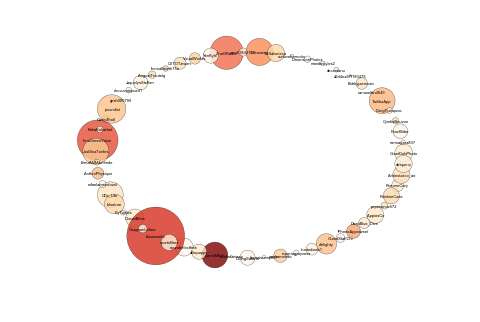

In [53]:
node_size = [user_infos[uid]['node_size'] for uid in g.nodes()]
node_color = [user_infos[uid]['node_color'] for uid in g.nodes()]
labels = {uid: user_infos[uid]['label'] for uid in g.nodes()}
nx.draw(
    g,
    cmap=plt.cm.OrRd,
    alpha=0.8,
    node_size=node_size,
    node_color=node_color,
    labels=labels,
    font_size=4,
    width=0.1
)

### computing connected components in an image

In [54]:
import itertools
import numpy as np
import networkx as nx
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
n = 10
img = np.random.randint(size=(n, n), low=0, high=3)
img

array([[2, 0, 2, 1, 1, 0, 0, 0, 2, 0],
       [1, 2, 1, 0, 0, 0, 1, 0, 0, 2],
       [2, 1, 0, 1, 2, 0, 2, 0, 1, 1],
       [0, 1, 1, 2, 0, 2, 1, 1, 2, 0],
       [1, 1, 1, 1, 0, 0, 2, 1, 2, 1],
       [0, 0, 0, 1, 0, 1, 2, 0, 2, 1],
       [0, 1, 2, 2, 1, 1, 0, 1, 1, 1],
       [2, 2, 2, 1, 2, 2, 2, 0, 2, 2],
       [0, 1, 2, 2, 1, 1, 0, 2, 1, 0],
       [0, 2, 0, 0, 2, 2, 1, 2, 1, 2]])

In [58]:
# generate grid with networkx
g = nx.grid_2d_graph(n, n)
g.nodes()

[(7, 3),
 (6, 9),
 (1, 3),
 (4, 8),
 (3, 0),
 (2, 8),
 (9, 8),
 (8, 0),
 (0, 7),
 (6, 2),
 (1, 6),
 (3, 7),
 (2, 5),
 (8, 5),
 (5, 8),
 (4, 0),
 (9, 0),
 (6, 7),
 (5, 5),
 (7, 6),
 (5, 0),
 (0, 4),
 (3, 5),
 (1, 1),
 (3, 2),
 (2, 6),
 (8, 2),
 (4, 5),
 (9, 3),
 (6, 0),
 (1, 4),
 (7, 5),
 (2, 3),
 (1, 9),
 (8, 7),
 (4, 2),
 (9, 6),
 (6, 5),
 (5, 3),
 (0, 1),
 (7, 0),
 (6, 8),
 (3, 1),
 (9, 9),
 (0, 6),
 (1, 7),
 (0, 9),
 (7, 8),
 (2, 4),
 (8, 4),
 (5, 9),
 (4, 7),
 (9, 1),
 (6, 6),
 (5, 6),
 (7, 7),
 (2, 1),
 (8, 9),
 (9, 4),
 (5, 1),
 (0, 3),
 (7, 2),
 (1, 2),
 (3, 8),
 (4, 9),
 (3, 3),
 (2, 9),
 (8, 1),
 (4, 4),
 (6, 3),
 (1, 5),
 (8, 8),
 (3, 6),
 (2, 2),
 (8, 6),
 (4, 1),
 (9, 7),
 (6, 4),
 (5, 4),
 (0, 0),
 (7, 1),
 (0, 5),
 (1, 0),
 (0, 8),
 (7, 9),
 (2, 7),
 (8, 3),
 (4, 6),
 (9, 2),
 (3, 4),
 (6, 1),
 (5, 7),
 (7, 4),
 (2, 0),
 (1, 8),
 (3, 9),
 (4, 3),
 (9, 5),
 (5, 2),
 (0, 2)]

In [64]:
def show_image(img, **kwargs):
    plt.imshow(img, origin='lower', interpolation='none', **kwargs)
    plt.axis('off')
    
def show_graph(g, **kwargs):
    nx.draw(
        g,
        pos={(i, j): (j, i) for i, j in g.nodes()},
        node_color=[img[i, j] for i, j in g.nodes()],
        linewidth=1,
        edge_color='w',
        with_labels=False,
        node_size=30,
        **kwargs
    )

In [65]:
cmap = plt.cm.Blues

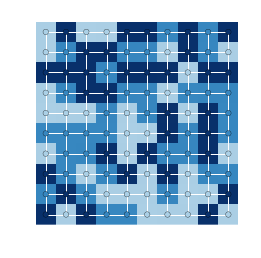

In [66]:
show_image(img, cmap=cmap, vmin=-1)
show_graph(g, cmap=cmap, vmin=-1)

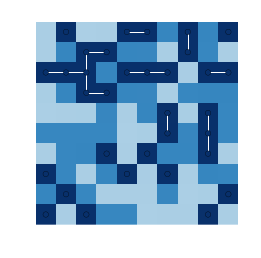

In [67]:
g2 = g.subgraph(zip(*np.nonzero(img==2)))  # select only dark blues
show_image(img, cmap=cmap, vmin=-1)
show_graph(g2, cmap=cmap, vmin=-1)

In [78]:
# select grouped components
components = [
    np.array([list(c) for c in comp])
    for comp in nx.connected_components(g2)
    if len(comp) >= 3
]
# array of connected points
components

[array([[8, 3],
        [7, 0],
        [8, 2],
        [7, 1],
        [6, 3],
        [6, 2],
        [7, 2]]), array([[3, 8],
        [5, 8],
        [4, 8]]), array([[7, 4],
        [7, 6],
        [7, 5]])]

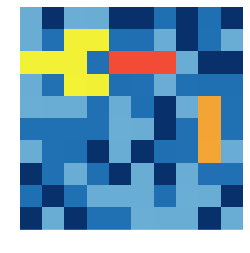

In [81]:
# assign new colors to these components
img_bis = img.copy()
for i, comp in enumerate(components):
    img_bis[comp[:, 0], comp[:, 1]] = i + 3
    
colors = [cmap(0.5), cmap(0.75), cmap(1.0), '#f4f235', '#f4a535', '#f44b35']
cmap2 = clr.ListedColormap(colors, 'indexed')
show_image(img_bis, cmap=cmap2)

### computing the voronoi diagram of a set of points

In [82]:
!pip install smopy

  Running setup.py bdist_wheel for smopy ... - \ | done
  Stored in directory: /Users/your/Library/Caches/pip/wheels/a6/16/19/0990071a42be1a3db44f2ab2e330e04ff134808d5cbe08fa07
Successfully built smopy


In [85]:
!pip install pillow

    100% |████████████████████████████████| 2.9MB 55kB/s 


In [87]:
import numpy as np
import pandas as pd
import scipy.spatial as spatial
import matplotlib.pyplot as plt
import matplotlib.path as path
import matplotlib as mpl
import smopy
import seaborn as sns
%matplotlib inline

In [88]:
df = pd.read_csv('cookbook-data/data/ratp.csv', sep='#', header=None)
df.head(3)

,0,1,2,3,4,5
0,1975,2.338713,48.884418,Abbesses,PARIS-18EME,metro
1,1981,2.326746,48.828399,Alésia,PARIS-14EME,metro
2,1978,2.394990,48.856174,Alexandre-Dumas,PARIS-11EME,metro


In [89]:
df[df.columns[1:]].tail(2)

,1,2,3,4,5
11609,2.301197,48.933118,TIMBAUD,GENNEVILLIERS,tram
11610,2.230144,48.913708,VICTOR BASCH,COLOMBES,tram


In [90]:
# select only metro
metro = df[(df[5] == 'metro')]
metro[metro.columns[1:]].tail(3)

,1,2,3,4,5
305,2.308041,48.841697,Volontaires,PARIS-15EME,metro
306,2.379884,48.857876,Voltaire (Léon Blum),PARIS-11EME,metro
307,2.304651,48.883874,Wagram,PARIS-17EME,metro


In [92]:
# select only paris
paris = metro[4].str.startswith('PARIS').values  # values to convert column to numpy array
paris

array([ True,  True,  True,  True, False, False,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [93]:
# assign integers to districts in paris, 0 if not in paris
districts = np.zeros(len(paris), dtype=np.int32)
districts[paris] = metro[4][paris].str.slice(6, 8).astype(np.int32)
districts[~paris] = 0
districts

array([18, 14, 11, 16,  0,  0, 18, 17,  3,  0,  7,  0, 15, 11, 15,  9,  0,
        4, 12, 19,  0, 12, 13,  0, 15, 18,  0,  0, 16, 19,  9, 19, 15,  0,
        0,  2, 11, 17, 19, 20,  9, 15, 13,  5,  0,  5,  8, 16,  0,  8, 15,
       11, 10,  0, 10, 18,  1,  0,  9,  3, 13,  4,  5, 10, 15,  8, 15, 19,
        0, 13,  8, 11, 12,  0,  0,  0, 19,  0, 19, 12, 14, 12, 15,  7,  7,
        0, 14, 16,  0,  0,  1,  8, 16, 11, 15, 15,  3,  0,  8,  0, 18, 18,
        0, 14,  0, 20, 13, 10, 12, 10,  0,  8, 13, 10,  9, 18,  9,  0,  4,
       16,  7, 10, 16, 19, 15, 20, 18,  5, 16, 10,  0,  0, 17, 18, 15, 16,
        7, 19, 12,  0,  9,  0, 13,  1,  0,  0,  8, 10,  0, 15,  1,  6,  8,
        0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0, 17, 20, 18,  0, 18,
        5, 11, 16, 16, 12, 16,  8,  8, 12, 14, 14, 12, 13,  9,  6, 11,  6,
       13,  9,  0,  0, 19,  1, 11, 16, 15, 20, 17, 11, 14, 11, 12,  0, 18,
        9, 19, 13,  5, 14,  0, 10,  0,  0,  0,  4,  1, 16, 16, 20, 17, 12,
       13, 17, 18, 18, 19

In [94]:
ndistricts = districts.max() + 1  # number of districts
ndistricts

21

In [95]:
lon = metro[1]
lat = metro[2]

In [96]:
box = (
    lat[paris].min(),
    lon[paris].min(),
    lat[paris].max(),
    lon[paris].max()
)
m = smopy.Map(box, z=12)  # generate map with smopy

In [97]:
np.c_[lat, lon]

array([[ 48.88441765,   2.33871281],
       [ 48.82839851,   2.32674567],
       [ 48.85617445,   2.39498982],
       [ 48.86464603,   2.30088337],
       [ 48.89247238,   2.28537388],
       [ 48.75471972,   2.30131372],
       [ 48.88313229,   2.34397283],
       [ 48.87553309,   2.28932166],
       [ 48.86529294,   2.35637778],
       [ 48.93016341,   2.28407447],
       [ 48.86089969,   2.32063224],
       [ 48.90382992,   2.39202195],
       [ 48.84696427,   2.29493808],
       [ 48.85097821,   2.39798013],
       [ 48.83627546,   2.27821833],
       [ 48.88362073,   2.34973719],
       [ 48.93660331,   2.35941472],
       [ 48.85284173,   2.36918061],
       [ 48.84189614,   2.40120563],
       [ 48.8720416 ,   2.37680561],
       [ 48.84533424,   2.4292385 ],
       [ 48.84042809,   2.37958297],
       [ 48.82960597,   2.37609261],
       [ 48.83194376,   2.23811   ],
       [ 48.85433316,   2.28878286],
       [ 48.88365361,   2.33166752],
       [ 48.90696994,   2.44962072],
 

In [99]:
vor = spatial.Voronoi(np.c_[lat, lon])  # seed points with matplotlib's spatial module

In [100]:
def voronoi_finite_polygons_2d(vor, radius=None):
    """Reconstruct infinite Voronoi regions in a 
    2D diagram to finite regions.
    Source: http://stackoverflow.com/questions/20515554/colorize-voronoi-diagram
    """
    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")
    new_regions = []
    new_vertices = vor.vertices.tolist()
    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()
    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, 
                                  vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))
    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]
        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue
        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]
        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue
            # Compute the missing endpoint of an infinite ridge
            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal
            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius
            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())
        # Sort region counterclockwise.
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]
        new_regions.append(new_region.tolist())
    return new_regions, np.asarray(new_vertices)

In [101]:
regions, vertices = voronoi_finite_polygons_2d(vor)
cells = [m.to_pixels(vertices[region]) for region in regions]

In [103]:
cmap = plt.cm.Set3
color_districts = cmap(np.linspace(0.0, 1.0, ndistricts))[:, :3]
color_districts

array([[ 0.5529412 ,  0.82745099,  0.78039217],
       [ 0.78435987,  0.91677048,  0.7397924 ],
       [ 0.98000769,  0.97877739,  0.71395619],
       [ 0.83706268,  0.82703577,  0.7997232 ],
       [ 0.79294119,  0.68392159,  0.77333334],
       [ 0.92708959,  0.55637065,  0.5446213 ],
       [ 0.85001154,  0.55546331,  0.55297194],
       [ 0.5795156 ,  0.66322186,  0.7662899 ],
       [ 0.69803923,  0.69882355,  0.65019609],
       [ 0.97293349,  0.70542101,  0.40169166],
       [ 0.8407997 ,  0.79178779,  0.3986313 ],
       [ 0.71318725,  0.86797386,  0.4308343 ],
       [ 0.8737255 ,  0.83058825,  0.70352942],
       [ 0.96616686,  0.8114879 ,  0.8904729 ],
       [ 0.88919647,  0.83787775,  0.86408305],
       [ 0.81886968,  0.75243369,  0.81997694],
       [ 0.76000001,  0.57176473,  0.76313727],
       [ 0.75989236,  0.65334873,  0.75249521],
       [ 0.79507883,  0.88865822,  0.77008844],
       [ 0.89647059,  0.92535179,  0.60987313],
       [ 1.        ,  0.92941177,  0.435

In [104]:
colors = 0.25 * np.ones((len(districts), 3))
colors

array([[ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0.25,  0.25,  0.25],
       [ 0

In [105]:
colors[paris] = color_districts[districts[paris]]

In [106]:
colors

array([[ 0.79507883,  0.88865822,  0.77008844],
       [ 0.88919647,  0.83787775,  0.86408305],
       [ 0.71318725,  0.86797386,  0.4308343 ],
       [ 0.76000001,  0.57176473,  0.76313727],
       [ 0.25      ,  0.25      ,  0.25      ],
       [ 0.25      ,  0.25      ,  0.25      ],
       [ 0.79507883,  0.88865822,  0.77008844],
       [ 0.75989236,  0.65334873,  0.75249521],
       [ 0.83706268,  0.82703577,  0.7997232 ],
       [ 0.25      ,  0.25      ,  0.25      ],
       [ 0.5795156 ,  0.66322186,  0.7662899 ],
       [ 0.25      ,  0.25      ,  0.25      ],
       [ 0.81886968,  0.75243369,  0.81997694],
       [ 0.71318725,  0.86797386,  0.4308343 ],
       [ 0.81886968,  0.75243369,  0.81997694],
       [ 0.97293349,  0.70542101,  0.40169166],
       [ 0.25      ,  0.25      ,  0.25      ],
       [ 0.79294119,  0.68392159,  0.77333334],
       [ 0.8737255 ,  0.83058825,  0.70352942],
       [ 0.89647059,  0.92535179,  0.60987313],
       [ 0.25      ,  0.25      ,  0.25 

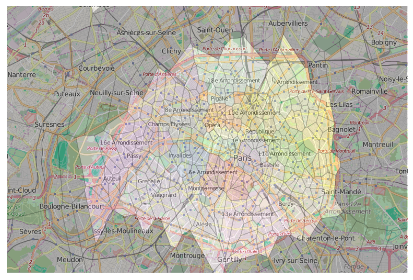

In [115]:
ax = m.show_mpl()
ax.add_collection(mpl.collections.PolyCollection(cells, facecolors=colors, edgecolors='k', alpha=0.35))

In [116]:
aa = np.array([11, 12, 13])

In [122]:
bb = np.array([1, 2, 3, 1, 2, 3, 1, 2, 3])
cc = bb > 2
cc
bb[cc]

array([3, 3, 3])

In [119]:
aa[[True, True, False]]

/Users/your/anaconda/envs/101/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


array([12, 12, 11])

### Manipulate geospatial data with shapely and basemap

In [123]:
!conda install gdal fiona basemap -y -q

Fetching package metadata: ....
Solving package specifications: ..............................................
Package plan for installation in environment /Users/your/anaconda/envs/101:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geos-3.3.3                 |                0         2.4 MB
    krb5-1.13.2                |                0         1.2 MB
    mkl-11.3.1                 |                0        99.1 MB
    openssl-1.0.1k             |                1         2.5 MB
    curl-7.43.0                |                1         391 KB
    python-3.5.0               |                0        12.7 MB
    click-4.1                  |           py35_0          89 KB
    libnetcdf-4.3.3.1          |                1         926 KB
    numpy-1.10.4               |           py35_0         2.6 MB
    cligj-0.2.0                |           py35_0           8 KB
    libgdal-2.0.0 

In [124]:
!pip install shapely descartes

    100% |████████████████████████████████| 180kB 496kB/s 
  Running setup.py bdist_wheel for shapely ... - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /Users/your/Library/Caches/pip/wheels/86/e1/32/40e1c88b8dca9503e5c34e392e72df51907c3247f237d1ba6d
  Running setup.py bdist_wheel for descartes ... - \ | / done
  Stored in directory: /Users/your/Library/Caches/pip/wheels/a3/04/16/21c0218d125d0a7bae30ab25b6f42cd5459f915e1b00f42fae
Successfully built shapely descartes


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as col
from mpl_toolkits.basemap import Basemap
import fiona
import shapely.geometry as geom
from descartes import PolygonPatch
import seaborn as sns
%matplotlib inline

Failed `CDLL(/usr/local/lib/libgeos_c.dylib)`
Failed `CDLL(/usr/local/lib/libgeos_c.dylib)`
Failed `CDLL(/Library/Frameworks/GEOS.framework/Versions/Current/GEOS)`
Failed `CDLL(/Library/Frameworks/GEOS.framework/Versions/Current/GEOS)`
Failed `CDLL(/opt/local/lib/libgeos_c.dylib)`
Failed `CDLL(/opt/local/lib/libgeos_c.dylib)`


OSError: Could not find lib geos_c or load any of its variants ['/Library/Frameworks/GEOS.framework/Versions/Current/GEOS', '/opt/local/lib/libgeos_c.dylib'].

In [145]:
!export DYLD_LIBRARY_PATH=/usr/local/Cellar/geos/3.4.2/

In [3]:
!echo $DYLD_LIBRARY_PATH

/usr/local/Cellar/geos/3.4.2/


In [ ]:
!python --version